In [1]:
import sympy
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.ipy_sympy import *
import scipy.linalg


import numpy.testing as np_test
import declarative as decl
from declarative.bunch import (
    DeepBunch,
)

#import numpy as np

from phasor import system
from phasor import readouts
from phasor import optics
from phasor.optics.nonlinear_crystal import NonlinearCrystal
from phasor.utilities.print import pprint



Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [2]:
    sys = system.BGSystem()
    sys.own.PSL = optics.Laser(
        F = sys.system.F_carrier_1064,
        power_W = 1.,
    )
    sys.own.dither = optics.AM()

    sys.own.ktp = NonlinearCrystal(
        nlg = .1,
        length_mm = np.linspace(0, 20,300),
        N_ode = 1000,
        solution_order = 5,
    )

    sys.own.mDC2 = optics.HarmonicMirror(
        mirror_H1 = optics.Mirror(
            T_hr = 1,
        ),
        mirror_H2 = optics.Mirror(
            T_hr = 0,
        ),
        AOI_deg = 45,
    )
    sys.own.PD_R = optics.MagicPD()
    sys.own.PD_G = optics.MagicPD()
    sys.own.hPD_R = optics.HiddenVariableHomodynePD()
    sys.own.hPD_G = optics.HiddenVariableHomodynePD()

    sys.PSL.po_Fr.bond_sequence(
        sys.dither.po_Fr,
        sys.ktp.po_Fr,
        sys.mDC2.po_FrA,
        sys.PD_R.po_Fr,
        sys.hPD_R.po_Fr,
    )
    sys.mDC2.po_FrB.bond_sequence(
        sys.PD_G.po_Fr,
        sys.hPD_G.po_Fr,
    )
    sys.own.DC_R = readouts.DCReadout(
        port = sys.PD_R.Wpd.o,
    )
    sys.own.DC_G = readouts.DCReadout(
        port = sys.PD_G.Wpd.o,
    )
    #print("A")
    #pprint(sys.ctree.test.PSL)
    #print("sys.DC_R.DC_readout", sys.DC_R.DC_readout, 2)
    #print("sys.DC_G.DC_readout", sys.DC_G.DC_readout, 1)


DELTA V MAX:  1.0  AT ORDER:  2
DELTA V MAX:  1.0  AT ORDER:  3
DELTA V MAX:  1.0  AT ORDER:  4
DELTA V MAX:  0  AT ORDER:  5


/home/mcculler/local/home_sync/projects/phasor/phasor/optics/hidden_variable_homodyne.py:49: RuntimeWarning: invalid value encountered in true_divide
  normalized_gain = source * self.cplg / np.sqrt(normalization_PWR)


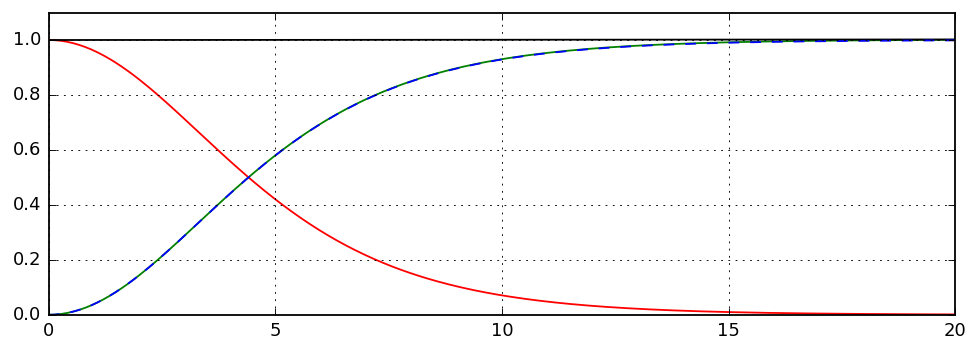

In [3]:
axB = mplfigB(Nrows=1)
axB.ax0.plot(sys.ktp.length_mm, sys.DC_R.DC_readout, color = 'red')
axB.ax0.plot(sys.ktp.length_mm, sys.DC_G.DC_readout, color = 'green')
axB.ax0.plot(sys.ktp.length_mm, sys.DC_R.DC_readout + sys.DC_G.DC_readout, color = 'black')
axB.ax0.plot(sys.ktp.length_mm, 1 * np.tanh(.200 * sys.ktp.length_mm)**2, ls = '--', color = 'blue')
axB.ax0.set_ylim(0, 1.1)

In [4]:
sys = system.BGSystem()
sys.own.PSL = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
)
sys.own.dither = optics.AM()

sys.own.ktp = NonlinearCrystal(
    nlg = .1,
    length_mm = 10,#np.linspace(0, 20, 2),
    N_ode = 100,
)

sys.own.mDC2 = optics.HarmonicMirror(
    mirror_H1 = optics.Mirror(
        T_hr = 1,
    ),
    mirror_H2 = optics.Mirror(
        T_hr = 0,
    ),
    AOI_deg = 45,
)
sys.own.PD_R = optics.MagicPD()
sys.own.PD_G = optics.MagicPD()
sys.own.hPD_R = optics.HiddenVariableHomodynePD()
sys.own.hPD_G = optics.HiddenVariableHomodynePD()

sys.system.bond_sequence(
    sys.PSL.po_Fr,
    sys.dither.po_Fr,
    sys.ktp.po_Fr,
    sys.mDC2.po_FrA,
    sys.PD_R.po_Fr,
    sys.hPD_R.po_Fr,
)
sys.system.bond_sequence(
    sys.mDC2.po_FrB,
    sys.PD_G.po_Fr,
    sys.hPD_G.po_Fr,
)
sys.own.DC_R = readouts.DCReadout(
    port = sys.PD_R.Wpd.o,
)
sys.own.DC_G = readouts.DCReadout(
    port = sys.PD_G.Wpd.o,
)
sys.own.AC_G = readouts.HomodyneACReadout(
    portNI = sys.hPD_G.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_R = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_R.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_RGI = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdI.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_N = readouts.NoiseReadout(
    port_map = dict(
        RI = sys.hPD_R.rtWpdI.o,
        RQ = sys.hPD_R.rtWpdQ.o,
        GI = sys.hPD_G.rtWpdI.o,
        GQ = sys.hPD_G.rtWpdQ.o,
    )
)
#print("A")
#pprint(sys.ctree.test.PSL)
#print("sys.DC_R.DC_readout", sys.DC_R.DC_readout, 2)
#print("sys.DC_G.DC_readout", sys.DC_G.DC_readout, 1)


In [5]:
print(sys.AC_R.AC_CSD_IQ[:,:].real)
print(sys.AC_G.AC_CSD_IQ[:,:].real)
print(sys.AC_RGI.AC_CSD_IQ[:,:].real)
print(sys.AC_R.AC_CSD_IQ[:,:].imag)
print(sys.AC_G.AC_CSD_IQ[:,:].imag)
print(sys.AC_RGI.AC_CSD_IQ[:,:].imag)
#print(sys.AC_G.AC_CSD_IQ)

DELTA V MAX:  1.0  AT ORDER:  2
DELTA V MAX:  1.0  AT ORDER:  3
DELTA V MAX:  1.0  AT ORDER:  4
DELTA V MAX:  0  AT ORDER:  5
[[  2.95063498e-20   0.00000000e+00]
 [  0.00000000e+00   3.20266704e-19]]
[[  1.70619168e-19   0.00000000e+00]
 [  0.00000000e+00   2.21543722e-19]]
[[  2.95063498e-20  -1.98021227e-20]
 [ -1.98021227e-20   1.70619168e-19]]
[[  0.00000000e+00  -4.27315706e-34]
 [ -4.51389831e-34   0.00000000e+00]]
[[  0.00000000e+00   2.40741243e-35]
 [  2.40741243e-35   0.00000000e+00]]
[[ 0.  0.]
 [ 0.  0.]]


In [6]:
print(sys.AC_R.AC_CSD_ellipse.min / 9.33e-20)
pprint(sys.AC_R.AC_CSD_ellipse)
print(sys.AC_G.AC_CSD_ellipse.min / (2 * 9.33e-20))
pprint(sys.AC_G.AC_CSD_ellipse)
print(sys.AC_RGI.AC_CSD_ellipse.min / (9.33e-20))
pprint(sys.AC_RGI.AC_CSD_ellipse)

0.316252409861
Bunch(
    'deg' = 89.999999631349098,
    'max' = 3.2026670395521625e-19,
    'min' = 2.95063498399929e-20,
    'rad' = 1.5707963203607247,
    )
0.914357815051
Bunch(
    'deg' = 89.999998754240323,
    'max' = 2.2154372219180949e-19,
    'min' = 1.7061916828853204e-19,
    'rad' = 1.5707963050522886,
    )
0.287033410317
Bunch(
    'deg' = 82.161436769909585,
    'max' = 1.7334530094597723e-19,
    'min' = 2.6780217182547756e-20,
    'rad' = 1.4339875898040568,
    )


In [7]:
def gen_arr(lst = ['RI', 'GI']):
    arr = np.zeros((len(lst), len(lst)))
    for idx_L, NL in enumerate(lst):
        for idx_R, NR in enumerate(lst):
            arr[idx_L, idx_R] = sys.AC_N.CSD[(NL, NR)].real
    return arr
print(gen_arr())
print(gen_arr(['RQ', 'GQ']))
print(gen_arr(['RI', 'GI', 'RQ', 'GQ']))

[[  2.95063498e-20  -1.98021227e-20]
 [ -1.98021227e-20   1.70619168e-19]]
[[  3.20266704e-19   7.43405451e-20]
 [  7.43405451e-20   2.21543722e-19]]
[[  2.95063498e-20  -1.98021227e-20   0.00000000e+00   0.00000000e+00]
 [ -1.98021227e-20   1.70619168e-19   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   3.20266704e-19   7.43405451e-20]
 [  0.00000000e+00   0.00000000e+00   7.43405451e-20   2.21543722e-19]]


In [29]:
sys = system.BGSystem()
sys.own.PSLR = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
)
sys.own.PSLG = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
    multiple = 2,
)
sys.own.dither = optics.AM()

sys.own.ktp = NonlinearCrystal(
    nlg = .1,
    length_mm = np.linspace(0, 10, 100),
    N_ode = 100,
)

sys.own.mDC2 = optics.HarmonicMirror(
    mirror_H1 = optics.Mirror(
        T_hr = 1,
    ),
    mirror_H2 = optics.Mirror(
        T_hr = 0,
    ),
    AOI_deg = 45,
)
sys.own.PD_R = optics.MagicPD()
sys.own.PD_G = optics.MagicPD()
sys.own.hPD_R = optics.HiddenVariableHomodynePD(
    source_port = sys.PSLR.po_Fr.o,
)
sys.own.hPD_G = optics.HiddenVariableHomodynePD(
    source_port = sys.PSLG.po_Fr.o,
)

sys.system.bond_sequence(
    sys.PSLR.po_Fr,
    sys.dither.po_Fr,
    sys.ktp.po_Fr,
    sys.mDC2.po_FrA,
    sys.PD_R.po_Fr,
    sys.hPD_R.po_Fr,
)
sys.system.bond_sequence(
    sys.mDC2.po_FrB,
    sys.PD_G.po_Fr,
    sys.hPD_G.po_Fr,
)
sys.own.DC_R = readouts.DCReadout(
    port = sys.PD_R.Wpd.o,
)
sys.own.DC_G = readouts.DCReadout(
    port = sys.PD_G.Wpd.o,
)
sys.own.AC_G = readouts.HomodyneACReadout(
    portNI = sys.hPD_G.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_R = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_R.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_RGI = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdI.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_N = readouts.NoiseReadout(
    port_map = dict(
        RI = sys.hPD_R.rtWpdI.o,
        RQ = sys.hPD_R.rtWpdQ.o,
        GI = sys.hPD_G.rtWpdI.o,
        GQ = sys.hPD_G.rtWpdQ.o,
    )
)
#print("A")
#pprint(sys.ctree.test.PSL)
#print("sys.DC_R.DC_readout", sys.DC_R.DC_readout, 2)
#print("sys.DC_G.DC_readout", sys.DC_G.DC_readout, 1)


DELTA V MAX:  1.0  AT ORDER:  2
DELTA V MAX:  1.0  AT ORDER:  3
DELTA V MAX:  0  AT ORDER:  4


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/mcculler/local/home_sync/projects/phasor/phasor/readouts/homodyne_AC.py:158: RuntimeWarning: invalid value encountered in true_divide
  ratio = ((NIQ[1, 0] > 0)*2 - 1) * np.sqrt(disc / (max_eig - min_eig))
/home/mcculler/local/home_sync/projects/phasor/phasor/readouts/homodyne_AC.py:159: RuntimeWarning: invalid value encountered in arccos
  ang_rad = np.pi - np.arccos(ratio)


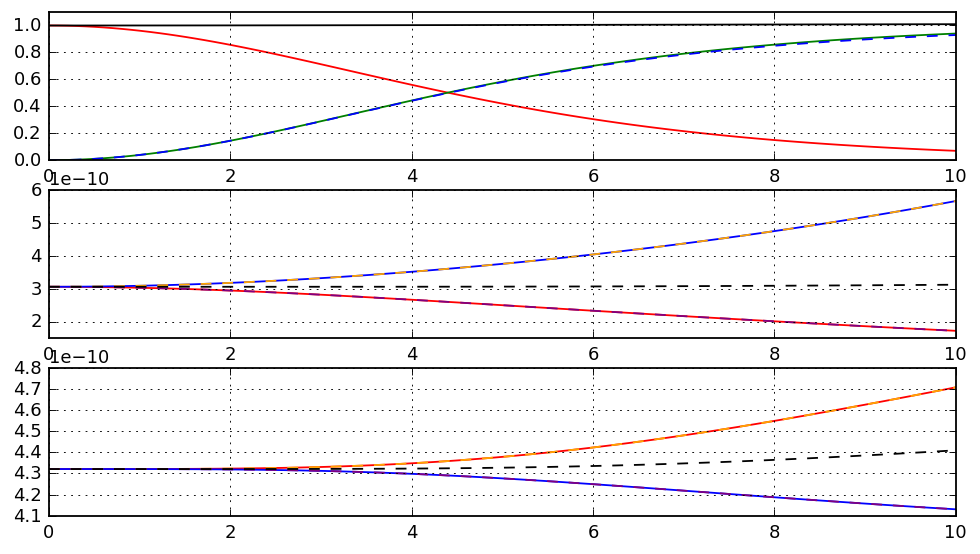

In [30]:
axB = mplfigB(Nrows=3)
axB.ax0.plot(sys.ktp.length_mm, sys.DC_R.DC_readout, color = 'red')
axB.ax0.plot(sys.ktp.length_mm, sys.DC_G.DC_readout, color = 'green')
axB.ax0.plot(sys.ktp.length_mm, sys.DC_R.DC_readout + sys.DC_G.DC_readout, color = 'black')
axB.ax0.plot(sys.ktp.length_mm, 1 * np.tanh(.200 * sys.ktp.length_mm)**2, ls = '--', color = 'blue')
axB.ax0.set_ylim(0, 1.1)
axB.ax1.plot(sys.ktp.length_mm, sys.AC_R.AC_CSD_IQ[0,0]**.5, color = 'red')
axB.ax1.plot(sys.ktp.length_mm, sys.AC_R.AC_CSD_IQ[1,1]**.5, color = 'blue')
axB.ax1.plot(sys.ktp.length_mm, sys.AC_R.AC_CSD_ellipse.max**.5, color = 'orange', ls = '--')
axB.ax1.plot(sys.ktp.length_mm, sys.AC_R.AC_CSD_ellipse.min**.5, color = 'purple', ls = '--')
axB.ax1.plot(sys.ktp.length_mm, sys.AC_R.AC_CSD_ellipse.min**.25 * sys.AC_R.AC_CSD_ellipse.max**.25, color = 'black', ls = '--')
axB.ax2.plot(sys.ktp.length_mm, sys.AC_G.AC_CSD_IQ[0,0]**.5, color = 'red')
axB.ax2.plot(sys.ktp.length_mm, sys.AC_G.AC_CSD_IQ[1,1]**.5, color = 'blue')
axB.ax2.plot(sys.ktp.length_mm, sys.AC_G.AC_CSD_ellipse.max**.5, color = 'orange', ls = '--')
axB.ax2.plot(sys.ktp.length_mm, sys.AC_G.AC_CSD_ellipse.min**.5, color = 'purple', ls = '--')
axB.ax2.plot(sys.ktp.length_mm, sys.AC_G.AC_CSD_ellipse.min**.25 * sys.AC_G.AC_CSD_ellipse.max**.25, color = 'black', ls = '--')
#axB.ax0.plot(sys.ktp.length_mm, sys.DC_G.DC_readout, color = 'green')
#axB.ax0.plot(sys.ktp.length_mm, sys.DC_R.DC_readout + sys.DC_G.DC_readout, color = 'black')
#axB.ax0.plot(sys.ktp.length_mm, 1 * np.tanh(.100 * sys.ktp.length_mm)**2, color = 'blue')
#axB.ax0.set_ylim(0, 1.1)

In [8]:
1.802e-19 - 2*2.36e-20

In [9]:
sys.AC_RGI.AC_CSD_IQ[0,0]

(2.9506349839992912e-20+0j)

In [10]:
sys.AC_RGI.AC_CSD_ellipse

Bunch(
    'deg' = 82.1614367699,
    'max' = 1.73345300946e-19,
    'min' = 2.67802171825e-20,
    'rad' = 1.4339875898,
    )

In [11]:
sys = system.BGSystem()
sys.own.PSLG = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
    multiple = 2,
)
sys.own.PSLR = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 0.001,
    multiple = 1,
)
sys.own.dither = optics.AM()

sys.own.ktp = NonlinearCrystal(
    nlg = .1,
    length_mm = 10, #np.linspace(0, 20, 2),
    N_ode = 20,
)

sys.own.mDC1 = optics.HarmonicMirror(
    mirror_H1 = optics.Mirror(
        T_hr = 0,
    ),
    mirror_H2 = optics.Mirror(
        T_hr = 1,
    ),
    AOI_deg = 45,
)
sys.own.mDC2 = optics.HarmonicMirror(
    mirror_H1 = optics.Mirror(
        T_hr = 1,
    ),
    mirror_H2 = optics.Mirror(
        T_hr = 0,
    ),
    AOI_deg = 45,
)
sys.own.PD_R = optics.MagicPD()
sys.own.PD_G = optics.MagicPD()
sys.own.hPD_R = optics.HiddenVariableHomodynePD(
    source_port = sys.PSLR.po_Fr.o,
)
sys.own.hPD_G = optics.HiddenVariableHomodynePD()

sys.system.bond_sequence(
    sys.PSLG.po_Fr,
    sys.mDC1.po_FrA,
    sys.dither.po_Fr,
    sys.ktp.po_Fr,
    sys.mDC2.po_FrA,
    sys.PD_R.po_Fr,
    sys.hPD_R.po_Fr,
)
#sys.system.bond_sequence(
#    sys.PSLR.po_Fr,
#    sys.mDC1.po_BkB,
#)
sys.system.bond_sequence(
    sys.mDC2.po_FrB,
    sys.PD_G.po_Fr,
    sys.hPD_G.po_Fr,
)
sys.own.DC_R = readouts.DCReadout(
    port = sys.PD_R.Wpd.o,
)
sys.own.DC_G = readouts.DCReadout(
    port = sys.PD_G.Wpd.o,
)
sys.own.AC_G = readouts.HomodyneACReadout(
    portNI = sys.hPD_G.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_R = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_R.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_RGI = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdI.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_N = readouts.NoiseReadout(
    port_map = dict(
        RI = sys.hPD_R.rtWpdI.o,
        RQ = sys.hPD_R.rtWpdQ.o,
        GI = sys.hPD_G.rtWpdI.o,
        GQ = sys.hPD_G.rtWpdQ.o,
    )
)
#print("A")
#pprint(sys.ctree.test.PSL)
#print("sys.DC_R.DC_readout", sys.DC_R.DC_readout, 2)
#print("sys.DC_G.DC_readout", sys.DC_G.DC_readout, 1)


In [12]:
print(sys.AC_R.AC_CSD_IQ[:,:])
print(sys.AC_G.AC_CSD_IQ[:,:])
print(sys.AC_RGI.AC_CSD_IQ[:,:])
print((sys.AC_R.AC_CSD_ellipse.min * sys.AC_R.AC_CSD_ellipse.max)**.5)
print(sys.AC_R.AC_CSD_ellipse.min / (sys.AC_R.AC_CSD_ellipse.min * sys.AC_R.AC_CSD_ellipse.max)**.5)
sys.AC_R.AC_CSD_ellipse

DELTA V MAX:  1.0  AT ORDER:  2
DELTA V MAX:  1.0  AT ORDER:  3
DELTA V MAX:  0  AT ORDER:  4
[[  3.51189991e-19+0.j  -3.38556848e-19+0.j]
 [ -3.38556848e-19+0.j   3.51189991e-19+0.j]]
[[  1.86696036e-19+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   1.86696036e-19+0.j]]
[[  3.51189991e-19+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   1.86696036e-19+0.j]]
9.33470448838e-20
0.13533522683


Bunch(
    'deg' = 45.0,
    'max' = 6.89746838796e-19,
    'min' = 1.26331434933e-20,
    'rad' = 0.785398163397,
    )

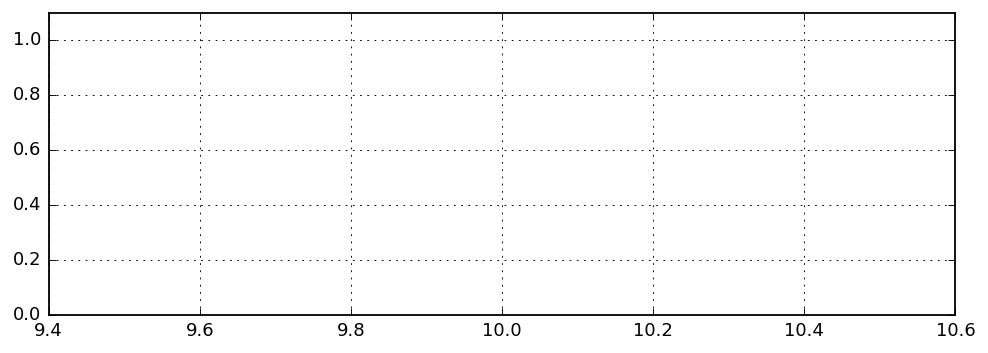

In [41]:
axB = mplfigB(Nrows=1)
axB.ax0.plot(sys.ktp.length_mm, sys.DC_R.DC_readout, color = 'red')
axB.ax0.plot(sys.ktp.length_mm, sys.DC_G.DC_readout, color = 'green')
axB.ax0.plot(sys.ktp.length_mm, sys.DC_R.DC_readout + sys.DC_G.DC_readout, color = 'black')
#axB.ax0.plot(sys.ktp.length_mm, 1 * np.tanh(.100 * sys.ktp.length_mm)**2, color = 'blue')
axB.ax0.set_ylim(0, 1.1)

In [46]:
sys = system.BGSystem()
sys.own.PSLG = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
    multiple = 2,
)
sys.own.PSLR = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 0.001,
    multiple = 1,
)
sys.own.PD_R = optics.MagicPD()
sys.own.PD_G = optics.MagicPD()
sys.own.dither = optics.AM()

sys.own.hPD_R = optics.HiddenVariableHomodynePD(
    source_port = sys.PSLR.po_Fr.o,
)
sys.own.hPD_G = optics.HiddenVariableHomodynePD()

sys.system.bond_sequence(
    sys.PSLG.po_Fr,
    sys.PD_G.po_Fr,
    sys.hPD_G.po_Fr,
)
sys.system.bond_sequence(
    sys.PSLR.po_Fr,
    sys.PD_R.po_Fr,
    sys.hPD_R.po_Fr,
)
sys.own.DC_R = readouts.DCReadout(
    port = sys.PD_R.Wpd.o,
)
sys.own.DC_G = readouts.DCReadout(
    port = sys.PD_G.Wpd.o,
)
sys.own.AC_G = readouts.HomodyneACReadout(
    portNI = sys.hPD_G.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_R = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_R.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_RGI = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdI.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_N = readouts.NoiseReadout(
    port_map = dict(
        RI = sys.hPD_R.rtWpdI.o,
        RQ = sys.hPD_R.rtWpdQ.o,
        GI = sys.hPD_G.rtWpdI.o,
        GQ = sys.hPD_G.rtWpdQ.o,
    )
)
#print("A")
#pprint(sys.ctree.test.PSL)
#print("sys.DC_R.DC_readout", sys.DC_R.DC_readout, 2)
#print("sys.DC_G.DC_readout", sys.DC_G.DC_readout, 1)


In [47]:
print(sys.AC_R.AC_CSD_IQ[:,:])
print(sys.AC_G.AC_CSD_IQ[:,:])
print(sys.AC_RGI.AC_CSD_IQ[:,:])
print((sys.AC_R.AC_CSD_ellipse.min * sys.AC_R.AC_CSD_ellipse.max)**.5)
print(sys.AC_R.AC_CSD_ellipse.min / (sys.AC_R.AC_CSD_ellipse.min * sys.AC_R.AC_CSD_ellipse.max)**.5)
sys.AC_R.AC_CSD_ellipse

DELTA V MAX:  1.0  AT ORDER:  2
DELTA V MAX:  1.0  AT ORDER:  3
DELTA V MAX:  0  AT ORDER:  4
[[  9.33480181e-20+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   9.33480181e-20+0.j]]
[[  1.86696036e-19+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   1.86696036e-19+0.j]]
[[  9.33480181e-20   0.00000000e+00]
 [  0.00000000e+00   1.86696036e-19]]
9.33480180645e-20
1.0


/home/mcculler/local/home_sync/projects/phasor/phasor/readouts/homodyne_AC.py:158: RuntimeWarning: invalid value encountered in true_divide
  ratio = ((NIQ[1, 0] > 0)*2 - 1) * np.sqrt(disc / (max_eig - min_eig))


Bunch(
    'deg' = nan,
    'max' = 9.33480180645e-20,
    'min' = 9.33480180645e-20,
    'rad' = nan,
    )